In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [6]:
img_path = r'../images/a.png'
model_path = r'../weights/shufflenetv2_emotion_recogn.h5'
EMOTIONS = ["angry", "scared", "happy", "sad", "surprised", "neutral"]

image = cv2.imread(img_path)
image = cv2.resize(image, (224, 224))

In [7]:
import sys
import os
current_dir = os.getcwd()
# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

In [8]:
# Import the desired file from the parent folder
from shufflenetv2  import ShuffleNetV2 # Replace with the actual file name (without .py extension)


base_model = ShuffleNetV2(include_top=True, input_shape=(224, 224, 3), load_model=model_path, classes=6)
base_model.summary()
base_model.save_weights('../weights/haha1205.h5')
emo = base_model.predict(np.expand_dims(image, 0))[0]
label = EMOTIONS[emo.argmax()]

Model: "ShuffleNetV2_1.0_1_373"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1 (Conv2D)                 (None, 112, 112, 24  648         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 maxpool1 (MaxPooling2D)        (None, 56, 56, 24)   0           ['conv1[0][0]']                  
                                                                             

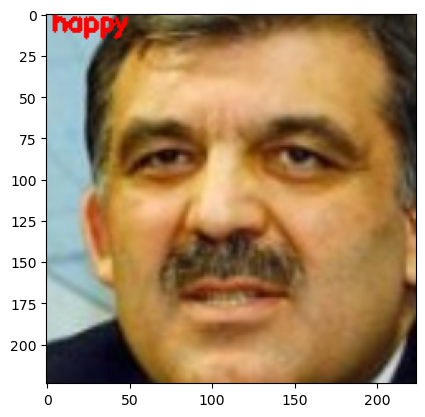

In [9]:
cv2.putText(image, label, (3,10),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))